In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.datasets.mnist as mnist

# Neural Network from Scratch

This notebook contains a detailed discussion and implementation of deep neural networks. Only numpy is used for matrix calculation. Rest of the code is developed from scratch. Each implementation contains an accompanying theoretical discussion along with it. It assumes that the reader has a basic understanding of vector calculation and how neural networks work.

## Dataset

MNIST handwritten digit dataset has been used for classification. The dataset contains 70,000 images of different digits (0-9). Each image is a 28x28 pixel grayscale image. The value of each pixel can be between 0 and 255 (inclusive). 

For the neural network, we convert the two dimensional image to a one dimensional vector consisting of 784 pixel values. Each pixel value is considered as a feature. We scale the value so that the value of each pixel ranges between 0 and 1 (inclusive).

__Dataset Architecture:__

Input shape [?, 784] : The input to the neural network contains a two dimensional matrix. The first dimension (?) contains the batch size (number of images provided to the network) and the second dimension (784) contains the number of features available for each sample.

Output Label [?, 10]: The output of the network contains two dimensional matrix. The first dimension (?) contains the batch size (number of images provided to the network) and the second dimension (10) contains the number of output classes available for the network.

Train dataset shape: (60000, 784), train label shape: (60000,)
Test dataset shape: (10000, 784), test label shape: (10000,)
Pixel value range: 0.0 - 1.0


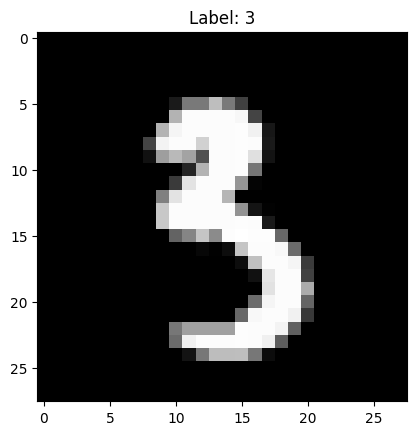

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train.reshape(X_train.shape[0], -1)/255.0, X_test.reshape(X_test.shape[0], -1)/255.0 # Scaling the dataset
print(f"Train dataset shape: {X_train.shape}, train label shape: {y_train.shape}")
print(f"Test dataset shape: {X_test.shape}, test label shape: {y_test.shape}")

print(f"Pixel value range: {np.min([np.min(X_train), np.min(X_test)])} - {np.max([np.max(X_train), np.max(X_test)])}")

plt.figure()
i = np.random.randint(0, len(X_train))
plt.title("Label: " + str(y_train[i]))
plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
plt.show()

## One hot encoding

In the dataset, the output label of each image is a value between 0-9. However, when performing classification the output of the network needs to be a probability distribution of each output class. This means that if we have an image of the digit '2' and the output class is the number '2', we need to convert that output to a vector as follows: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

This process of converting a number to a vector is known as one-hot encoding. The network itself will provide the output as a one-hot encoded vector of probability distribution. We need to convert the train and test labels to the same form in order to compute the error between the predicted and true output.

In [3]:
def one_hot_encoded(y, total_classes):
    """
    Calculates the one-hot encoded vector from the output label
    @param y [1D numpy array]: A vector containing output labels
    @param total_classes [int]: Number of total classes available in the output layer
    
    Returns [2D numpy array]: one-hot encoded vector for the output labels
    """
    if len(y.shape) >= 2:
        return y
    encoded = np.zeros((y.shape[0], total_classes))
    encoded[np.arange(y.shape[0]), y] = 1
    return encoded

In [4]:
sample_classes = np.array([0, 1, 2, 3])
one_hot_encoded_classes = one_hot_encoded(sample_classes, 10)
for i in range(len(sample_classes)):
    print(f"Label {sample_classes[i]} : One hot encoded vector => {one_hot_encoded_classes[i]}")

Label 0 : One hot encoded vector => [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Label 1 : One hot encoded vector => [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Label 2 : One hot encoded vector => [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Label 3 : One hot encoded vector => [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Activation Functions

Activation functions are used to introduce non-linearity to the output of a specific layer. The following activation functions are used for the network:

1. __Rectified Linear Unit (ReLU):__ This activation function is applied to the output of hidden layers. It reduces the likelihood of vanishing gradient. Furthermore, it introduces sparsity and it is easier to calculate the derivative of this function.


2. __Softmax:__ This activation function is applied to the final output produced by the output layer. It is used to calculate the probablity distributio of each output class/label. This helps in classification.

### ReLU

\begin{equation}
Y = f(x) = \begin{cases}
0 \text{ if } x < 0\\
x \text{ otherwise}
\end{cases}
\end{equation}

ReLU replaces all negative numbers to zero. The derivative of ReLU is calculated as follows:

\begin{equation}
Y' = f'(x) = \begin{cases}
0 \text{ if } x = 0\\
1 \text{ otherwise}
\end{cases}
\end{equation}

The slope of positive numbers are 1 as positive input to the function is same as the output of the function.



In [5]:
def relu(x):
    """
    Computes the ReLU activated output
    @aram x [numpy array or int]: The non-activated output
    Returns [numpy array or int]: The activated output
    """
    return np.maximum(0.0, x)

def derivative_relu(x):
    """
    Computes the derivative of the ReLU activated output
    @aram x [numpy array or int]: The activated output
    Returns [numpy array or int]: The derivative of the activated output
    """
    return np.where(x > 0, 1.0, 0.0)

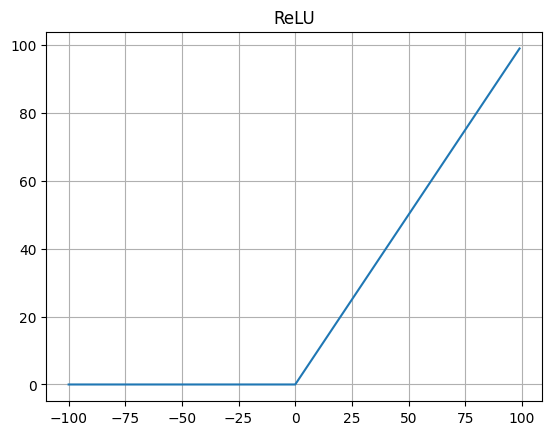

In [6]:
plt.figure()
plt.title('ReLU')
plt.plot(np.arange(-100, 100, 1), [relu(i) for i in np.arange(-100, 100, 1)])
plt.grid()
plt.show()

### Softmax

\begin{equation}
Y = f(x) = \frac{e^{x - max(x)}}{\sum_{i=0}^n e^{x - max(x)}}
\end{equation}

Here, 'n' is the total number of output classes (as this function is applied to the output layer only) which is 10.

Softmax takes each output (probability of class label) and exponentially increases it and finally scales it down to range between 0 and 1. It provides an advantage that the class output which has a higher probability is increased a lot (due to exponential increase) and after scaling becomes close to one. On the other hand, all other class labels become close to zero.

In [7]:
def softmax(x):
    """
    Computes the softmax activated output
    @aram x [2D numpy array]: The non-activated output provided by output layer
    Returns [2D numpy array]: The activated output provided by output layer
    """
    exp_x =  np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x/np.sum(exp_x, axis=1, keepdims=True)

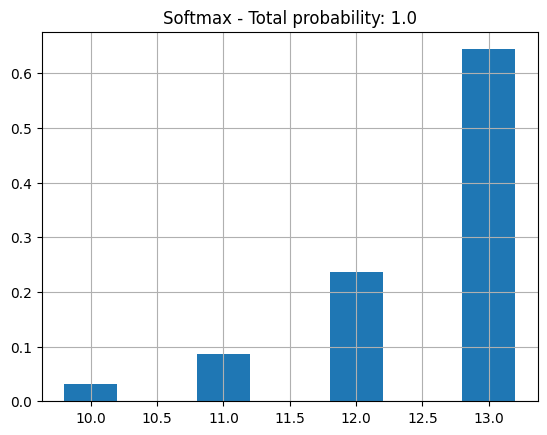

In [8]:
x = np.array([[10, 11, 12, 13]])
y = softmax(x)
plt.figure()
plt.title(f'Softmax - Total probability: {np.sum(y[0])}')
plt.bar(x[0], y[0], width=0.4)
plt.grid()
plt.show()

## Optimizers

When performing backpropagation algorithm, we normally use gradient descent to calculate the gradient of weights and biases of each layer. Optimization algorihms are a variant of gradient descent that is used to improve the performance of the backpropagation. We will use the following optimization algorithm:

1. Adagrad

2. RMSProp

3. Adam

Source: [https://www.geeksforgeeks.org/intuition-of-adam-optimizer/](https://www.geeksforgeeks.org/intuition-of-adam-optimizer/)

In [9]:
def adagrad(momentum, gradient_of_weight, beta=0.9):
    """
    Computes the adagrad optimization.
    @param momentum [2D numpy array]: Current momentum
    @param gradient_of_weight [2D numpy array]: Computed gradients of the weight of a layer
    @param beta [float]: Decay rate of average gradient
    Returns updated momentum and gradient_of_weight
    """
    momentum = (beta * momentum) + ((1 - beta) * gradient_of_weight)
    gradient_of_weight = momentum.copy()
    return momentum, gradient_of_weight

def rmsprop(sum_of_square, gradient_of_weight, beta=0.9999, epsilon=1e-8):
    """
    Computes the rmsprop optimization.
    @param sum_of_square [2D numpy array]: Current sum of squares of gradient
    @param gradient_of_weight [2D numpy array]: Computed gradients of the weight of a layer
    @param beta [float]: Decay rate of average gradient
    @param epsilon [float]: Small positive constant to avoid division by zero
    Returns updated sum_of_square and gradient_of_weight
    """
    sum_of_square = (beta * sum_of_square) + ((1 - beta) * np.square(gradient_of_weight))
    gradient_of_weight *= (1.0 /(np.sqrt(sum_of_square) + epsilon))
    return sum_of_square, gradient_of_weight

def adam(momentum, sum_of_square, gradient_of_weight, beta_1=0.9, beta_2=0.999, epsilon=1e-8):
    """
    Computes the adam optimization.
    @param momentum [2D numpy array]: Current momentum
    @param sum_of_square [2D numpy array]: Current sum of squares of gradient
    @param gradient_of_weight [2D numpy array]: Computed gradients of the weight of a layer
    @param beta_1 [float]: Decay rate of average gradient for adagrad calculation
    @param beta_2 [float]: Decay rate of average gradient for rmsprop calculation
    @param epsilon [float]: Small positive constant to avoid division by zero
    Returns updated momentum, sum_of_square, and gradient_of_weight
    """
    momentum = (beta_1 * momentum) + ((1 - beta_1) * gradient_of_weight)
    sum_of_square = (beta_2 * sum_of_square) + ((1 - beta_2) * np.square(gradient_of_weight))
    gradient_of_weight = momentum/(np.sqrt(sum_of_square) + epsilon)
    return momentum, sum_of_square, gradient_of_weight

## Loss and Accuracy

When training the network, we need to periodically test the accuracy and loss of the network. Categorical Crossentropy is an algorithm that is used to calculate the loss of the network by comparing the true output label with the output predictions provided by the network.

In [10]:
def categorical_crossentropy(y_true, y_pred):
    """
    Computes categorical crossentropy between the predicted and true labels.
    @param y_true [2D Numpy array]: True labels, shape (num_examples, num_classes)
    @pram y_pred [2D Numpy array]: Predicted labels, shape (num_examples, num_classes)

    Returns [float]: the categorical crossentropy loss between y_true and y_pred
    """
    # Avoid numerical instability by clipping values to a minimum epsilon
    epsilon = 1e-10
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)

    # Compute cross-entropy loss
    ce_loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

    return ce_loss

def accuracy(y_true, y_pred):
    """
    Computes accuracy of the network based on the predicted output and the expected/true output.
    @param y_true [2D Numpy array]: True labels, shape (num_examples, num_classes)
    @pram y_pred [2D Numpy array]: Predicted labels, shape (num_examples, num_classes)

    Returns [float]: the accuracy of the network
    """
    return np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))

## Forward propagation

\begin{equation}
Output, Y = Activation(W.x + b)
\end{equation}

Here,

- 'W' is the weight matrix of the current layer

- 'x' is the input matrix provided to the current layer

- 'b' is the bias for the current layer

If the previous layer 'A' contains 2 neurons and the current layer 'B' contains 3 neurons, then the weight matrix

\begin{equation}
W = \left\lbrack \matrix{W_{A_1B_1} W_{A_1B_2} W_{A_1B_3} \cr W_{A_2B_1} W_{A_2B_2} W_{A_2B_3}} \right\rbrack
\end{equation}

The input (assuming it contains 1 sample input

\begin{equation}
x = \left\lbrack \matrix{x_{A_1} x_{A_2}} \right\rbrack
\end{equation}

and the bias of the current layer

\begin{equation}
b = \left\lbrack \matrix{b_{B_1} b_{B_2} b_{B_3}} \right\rbrack
\end{equation}

Therefore the non-activated output

\begin{equation}
z = \left\lbrack \matrix{z_{B_1} z_{B_2} z_{B_3}} \right\rbrack
\end{equation}

In [11]:
def feed_forward(x, W, b, activation):
    """
    Returns the activated output for a layer.
    @param x [2D numpy array] : The input to the current layer. First dimension is the number of samples 
    and the second dimension is the number of features of each sample.
    
    @param W [2D numpy array] : The weight of the current layer. First dimension is the number of 
    neurons in previous layer/input and the second dimension is the number of neurons in current layer.
    
    @param b [2D numpy array] : Bias of the current layer. The 
    first dimension is always 1 and the second dimension is the number of neurons in current layer
    
    @param activation [function]: The activation function for the current layer.
    """
    return activation(np.dot(x, W) + b)

## Error of output layer

The error of output layer is calculated by subtracting the value (probability) of each class of each sample from the value of each class of the training label (one hot encoded).

\begin{equation}
Error, E = Y^{predicted} - Y^{true}
\end{equation}

If the final output contains 1 sample and 3 classes, where

\begin{equation}
Y^{predicted} = \left\lbrack \matrix{Y^P_1 Y^P_2 Y^P_3} \right\rbrack
\end{equation}

and

\begin{equation}
Y^{true} = \left\lbrack \matrix{Y^T_1 Y^T_2 Y^T_3} \right\rbrack
\end{equation}

then

\begin{equation}
\left\lbrack \matrix{E_1 E_2 E_3} \right\rbrack = \left\lbrack \matrix{Y^P_1 Y^P_2 Y^P_3} \right\rbrack - \left\lbrack \matrix{Y^T_1 Y^T_2 Y^T_3} \right\rbrack
\end{equation}

In [12]:
def calculate_output_error(y_true, y_pred):
    """
    Computes error of the output layer.
    @param y_true [2D Numpy array]: True labels, shape (num_examples, num_classes)
    @pram y_pred [2D Numpy array]: Predicted labels, shape (num_examples, num_classes)

    Returns [2D Numpy array]: the error vector
    """
    return y_pred - y_true

## Error of hidden layers

The error of each hidden layer's output is calculated by computing the dot product between the error of the next layer and weight matrix of the next layer. The result is then multiplied (element-wise) by the non-activated input to the next layer. 

The dot product provides a weighted error of the next layer. The input to the next layer is actually output of the current layer. So, multiplying the weighted error by the current layer's output provides the amount contribution that made to the final error by current layer's output.

Let the current layer be 'A' and the next layer be 'B'. 

Let, the error produced by the next layer be '$E_B$' where

\begin{equation}
E_B =  \left\lbrack \matrix{E_{B_1} E_{B_2} E_{B_3}} \right\rbrack
\end{equation}

and the weight matrix of the current layer be 

\begin{equation}
W_B = \left\lbrack \matrix{W_{A_1B_1} W_{A_1B_2} W_{A_1B_3} \cr W_{A_2B_1} W_{A_2B_2} W_{A_2B_3}} \right\rbrack
\end{equation}

and non-activated output of the current layer be

\begin{equation}
Y'_A =  \left\lbrack \matrix{Y'_{A_1} Y'_{A_2}} \right\rbrack
\end{equation}

Therefore, error of the current layer

\begin{equation}
E_A =  (E_B . W^T_B) * Y'_A \\
E_A = (\left\lbrack \matrix{E_{B_1} E_{B_2} E_{B_3}} \right\rbrack . \left\lbrack \matrix{W_{A_1B_1} W_{A_2B_1} \cr W_{A_1B_2} W_{A_2B_2} \cr W_{A_1B_3} W_{A_2B_3}} \right\rbrack) * \left\lbrack \matrix{Y'_{A_1} Y'_{A_2}} \right\rbrack \\
E_A = \left\lbrack \matrix{E_{A_1} E_{A_2}} \right\rbrack
\end{equation}

In [13]:
def calculate_hidden_error(error_next_layer, weight_next_layer, non_activated_output_current_layer):
    """
    Calculates output of the hidden layer
    @param error_next_layer [2D Numpy array]: Error generated by the next layer. First dimension is the number of samples
    @param weight_next_layer [2D Numpy array]: Weight matrix of the next layer
    @param non_activated_output_current_layer [2D Numpy array]: Non-activated output of the current layer
    
    Returns [2D Numpy array]: Error of the current layer
    """
    return  np.dot(error_next_layer, weight_next_layer.T) * non_activated_output_current_layer

## Gradient of weights of current layer

Gradient is the amount which needs to be subtracted from existing weight/biases in order to account for the error in one iteration. This update changes the weight to minimize the error for the outputs produced.

To calculate the gradient of weights of the current layer, we compute the dot product between the input (transposed) provided to the current layer and error of the current layer. We, then scale the result by dividing it with the total number of sample data provided in the input.

Let 'G' be gradient of the current layer 'B', 'Y_A' be input to the current layer and output of the previous layer 'A', and 'E_B' be the error of the current layer's output. Let the total number of sample data in input be 'n'. Let the learning rate be '$\alpha$'. Therefore,

\begin{equation}
Y_A = \left\lbrack \matrix{Y_{A_1} Y_{A_2}} \right\rbrack
\end{equation}

and 

\begin{equation}
E_B = \left\lbrack \matrix{E_{B_1} E_{B_2} E_{B_3}} \right\rbrack
\end{equation}

Therefore,

\begin{equation}
G_B = (Y^T_A . E_B) * \frac{1}{n} \\
G_B = (\left\lbrack \matrix{Y_{A_1} \cr Y_{A_2}} \right\rbrack . \left\lbrack \matrix{E_{B_1} E_{B_2} E_{B_3}} \right\rbrack)  * \frac{1}{n} \\
G_B = \left\lbrack \matrix{G^B_{A_1B_1} G^B_{A_1B_2} G^B_{A_1B_3} \cr G^B_{A_2B_1} G^B_{A_2B_2} G^B_{A_2B_3}} \right\rbrack
\end{equation}

Since, weight of the layer 'B' is 

\begin{equation}
W_B = \left\lbrack \matrix{W_{A_1B_1} W_{A_1B_2} W_{A_1B_3} \cr W_{A_2B_1} W_{A_2B_2} W_{A_2B_3}} \right\rbrack
\end{equation}

we update the weight by subtracting the gradient from current weight

\begin{equation}
W^{updated}_B = W_B - \alpha * G_B \\
W^{updated}_B = \left\lbrack \matrix{W_{A_1B_1} W_{A_1B_2} W_{A_1B_3} \cr W_{A_2B_1} W_{A_2B_2} W_{A_2B_3}} \right\rbrack - \alpha * \left\lbrack \matrix{G^B_{A_1B_1} G^B_{A_1B_2} G^B_{A_1B_3} \cr G^B_{A_2B_1} G^B_{A_2B_2} G^B_{A_2B_3}} \right\rbrack
\end{equation}

__Note: When using an optimizer, we first compute the gradient and then optimize the gradient using optimization algorithm. We then subtract the optimized gradient from the current weights in order to get the updated weights__

In [14]:
def calculate_weight_gradient(error_current_layer, input_current_layer):
    """
    Computes gradeint of the weights of the current layer.
    @param error_current_layer [2D Numpy array]: Error generated by the current layer's output. First dimension is the number 
    of samples
    @param input_current_layer [2D Numpy array]: Input vector provided to the current layer. First dimension is the number 
    of samples
    
    Returns [2D Numpy array]: Gradient of the weights of the current layer
    """
    return (1.0/input_current_layer.shape[0]) * np.dot(input_current_layer.T, error_current_layer)

## Gradient of bias of current layer

Gradient is the amount which needs to be subtracted from existing weight/biases in order to account for the error in one iteration. This update changes the bias to minimize the error for the outputs produced.

To calculate the gradient of bias of the current layer, we calculate the sum of error of all data samples of each neuron in the current layer and divide it by the total number of data samples provided to the current layer.

Let 'G' be gradient of the bias of current layer 'B' and 'E_B' be the error of the current layer's output. Let the total number of sample data in input be 'n' and the total number of neurons be 3. Let the learning rate be '$\alpha$'. Therefore,


\begin{equation}
E_B = \left\lbrack \matrix{E_{B_1} E_{B_2} E_{B_3}} \right\rbrack
\end{equation}

Therefore,

\begin{equation}
G_B = \frac{1}{n} * \left\lbrack \matrix{ (\sum^n_{i=0} E_{B_1}) (\sum^n_{i=0} E_{B_2}) (\sum^n_{i=0} E_{B_3}) } \right\rbrack \\
G_B = \left\lbrack \matrix{G_{B_1} G_{B_2} G_{B_3}} \right\rbrack
\end{equation}

We update the bias by subtracting the gradient from current bias

\begin{equation}
B^{updated}_B = B_B - \alpha * G_B \\
B^{updated}_B = \left\lbrack \matrix{B_{B_1} B_{B_2} B_{B_3}} \right\rbrack - \alpha * \left\lbrack \matrix{G_{B_1} G_{B_2} G_{B_3}} \right\rbrack
\end{equation}

In [15]:
def calculate_bias_gradient(error_current_layer):
    """
    Computes gradeint of the weights of the current layer.
    @param error_current_layer [2D Numpy array]: Error generated by the current layer's output. First dimension is the number 
    of samples
    
    Returns [2D Numpy array]: Gradient of the bias of the current layer
    """
    return (1.0/error_current_layer.shape[0]) * np.sum(error_current_layer, axis=0, keepdims=True)

## Update weights and biases

__1. Weights:__

\begin{equation}
W^{updated}_B = W_B - \alpha * G_B \\
W^{updated}_B = \left\lbrack \matrix{W_{A_1B_1} W_{A_1B_2} W_{A_1B_3} \cr W_{A_2B_1} W_{A_2B_2} W_{A_2B_3}} \right\rbrack - \alpha * \left\lbrack \matrix{G^B_{A_1B_1} G^B_{A_1B_2} G^B_{A_1B_3} \cr G^B_{A_2B_1} G^B_{A_2B_2} G^B_{A_2B_3}} \right\rbrack
\end{equation}

__2. Biases:__

\begin{equation}
B^{updated}_B = B_B - \alpha * G_B \\
B^{updated}_B = \left\lbrack \matrix{B_{B_1} B_{B_2} B_{B_3}} \right\rbrack - \alpha * \left\lbrack \matrix{G_{B_1} G_{B_2} G_{B_3}} \right\rbrack
\end{equation}

__Note: When using an optimizer, we first compute the gradient and then optimize the gradient using optimization algorithm. We then subtract the optimized gradient from the current weights in order to get the updated weights__

In [1]:
def update_weights(weights, gradient, learning_rate):
    """
    @param weights [2D Numpy array]: Weight matrix of the current layer
    @param gradient [2D Numpy array]: Gradient of the weight of the current layer
    @param learning_rate [float]: Learning rate
    
    Returns [2D Numpy array]: Updated weights
    """
    return weights - (learning_rate * gradient)

def update_biases(biases, gradient, learning_rate):
    """
    @param biases [2D Numpy array]: Bias matrix of the current layer
    @param gradient [2D Numpy array]: Gradient of the weight of the current layer
    @param learning_rate [float]: Learning rate
    
    Returns [2D Numpy array]: Updated biases
    """
    return biases - (learning_rate * gradient)

## Creating the network

__Architecture:__

1. Number of features in input sample: 784

2. Total hidden layers: 2

3. Neurons in output layer: 10 (classes)

4. Neurons in hidden layer 1: 128

5. Neurons in hidden layer 2: 64

6. Hidden Activation: ReLU

7. Output Activation: Softmax

In [17]:
def create_network(input_features, output_classes):
    """
    Initializes the weights and biases of the network and returns them
    @param input_features [int]: Number of features in the input data
    @param output_classes [int]: Number of output classes
    
    Returns weights and biases of hidden and output layers
    """
    
    # Hidden layer 1
    hidden_layer_1_weights = np.random.randn(input_features, 128)
    hidden_layer_1_biases = np.random.randn(1, 128)

    # Hidden layer 2
    hidden_layer_2_weights = np.random.randn(128, 64)
    hidden_layer_2_biases = np.random.randn(1, 64)

    # Output layer
    output_layer_weights = np.random.randn(64, output_classes)
    output_layer_biases = np.random.randn(1, output_classes)
    
    return hidden_layer_1_weights, hidden_layer_1_biases, hidden_layer_2_weights, \
            hidden_layer_2_biases, output_layer_weights, output_layer_biases



## Training the network

1. Epochs: 100

2. Optimization algorithm: Adam => parameters: beta 1: 0.9, beta 2: 0.999, epsilon: 1e-8

3. Learning rate: 0.001

4. Batch size: 32

In [18]:
epochs = 20
batch_size = 32
learning_rate = 0.001


weights_h1, bias_h1, weights_h2, bias_h2, weights_out, bias_out = create_network(X_train.shape[1], 10)

# Adam optimizer params
beta_1, beta_2, epsilon = 0.9, 0.999, 1e-8
momentums = [
    np.zeros(weights_h1.shape, dtype=weights_h1.dtype),
    np.zeros(weights_h2.shape, dtype=weights_h2.dtype),
    np.zeros(weights_out.shape, dtype=weights_out.dtype)
]

sum_of_square = [
    np.zeros(weights_h1.shape, dtype=weights_h1.dtype),
    np.zeros(weights_h2.shape, dtype=weights_h2.dtype),
    np.zeros(weights_out.shape, dtype=weights_out.dtype)
]


# One hot encoding labels
y_train_encoded = one_hot_encoded(y_train, total_classes=10)
y_test_encoded = one_hot_encoded(y_test, total_classes=10)

# Output results

accs, losses = [], []

for i in range(epochs): # For each epoch
    # Shuffle the training data
    idx = np.random.permutation(len(X_train))
    x, y_encoded = X_train.copy()[idx, :], y_train_encoded.copy()[idx, :]
    
    for j in range(0, x.shape[0], batch_size): # For each batch
        # Get the batch of data
        x_batch, y_batch = x[j:j+batch_size, :], y_encoded[j:j+batch_size, :]
        
        # ===STEP 1: Feed forward to generate the output from each layer ===
        
        # Get the activated output of first hidden layer
        y_h1 = feed_forward(x_batch, weights_h1, bias_h1, activation=relu)
        
        # Get the activated output of second hidden layer
        y_h2 = feed_forward(y_h1, weights_h2, bias_h2, activation=relu)
        
        # Get the activated output of output layer
        y_out = feed_forward(y_h2, weights_out, bias_out, activation=softmax)
        
        
        # ===STEP 2: Compute error of the output layer===
        
        error_out = calculate_output_error(y_true=y_batch, y_pred=y_out)
        
        # ===STEP 3: Compute error of the hidden layers===
        error_h2 = calculate_hidden_error(
            error_next_layer=error_out, 
            weight_next_layer=weights_out, 
            non_activated_output_current_layer=derivative_relu(y_h2)
        )
        
        error_h1 = calculate_hidden_error(
            error_next_layer=error_h2, 
            weight_next_layer=weights_h2, 
            non_activated_output_current_layer=derivative_relu(y_h1)
        )
        
        #===STEP 4: Compute gradient of the output & hidden layers===
        grad_out_weight = calculate_weight_gradient(
            error_current_layer=error_out, 
            input_current_layer=y_h2
        )
        grad_out_bias = calculate_bias_gradient(error_current_layer=error_out)
        
        grad_h2_weight = calculate_weight_gradient(
            error_current_layer=error_h2, 
            input_current_layer=y_h1
        )
        grad_h2_bias = calculate_bias_gradient(error_current_layer=error_h2)
        
        
        grad_h1_weight = calculate_weight_gradient(
            error_current_layer=error_h1, 
            input_current_layer=x_batch
        )
        grad_h1_bias = calculate_bias_gradient(error_current_layer=error_h1)
        
        
        #==STEP 5: Optmize the gradients using optimization algorithm===
        momentums[2], sum_of_square[2], grad_out_weight = adam(
            momentum=momentums[2], 
            sum_of_square=sum_of_square[2], 
            gradient_of_weight=grad_out_weight, 
            beta_1=beta_1, beta_2=beta_2, epsilon=epsilon
        )
        
        momentums[1], sum_of_square[1], grad_h2_weight = adam(
            momentum=momentums[1], 
            sum_of_square=sum_of_square[1], 
            gradient_of_weight=grad_h2_weight, 
            beta_1=beta_1, beta_2=beta_2, epsilon=epsilon
        )
        
        momentums[0], sum_of_square[0], grad_h1_weight = adam(
            momentum=momentums[0], 
            sum_of_square=sum_of_square[0], 
            gradient_of_weight=grad_h1_weight, 
            beta_1=beta_1, beta_2=beta_2, epsilon=epsilon
        )
        
        #===STEP 6: Update the weights and biases
        weights_out = update_weights(weights_out, grad_out_weight, learning_rate)
        bias_out = update_biases(bias_out, grad_out_bias, learning_rate)
        
        weights_h2 = update_weights(weights_h2, grad_h2_weight, learning_rate)
        bias_h2 = update_biases(bias_h2, grad_h2_bias, learning_rate)
        
        weights_h1 = update_weights(weights_h1, grad_h1_weight, learning_rate)
        bias_h1 = update_biases(bias_h1, grad_h1_bias, learning_rate)
    
    #===STEP 7: Compute the accuracy and loss at the end of each epoch===
    y_predicted = feed_forward(
        feed_forward(
            feed_forward(
                X_test.copy(),
                weights_h1,
                bias_h1,
                activation=relu
            ),
            weights_h2,
            bias_h2,
            activation=relu
        ), 
        weights_out, 
        bias_out, 
        activation=softmax
    )
    
    loss = categorical_crossentropy(y_true=y_test_encoded, y_pred=y_predicted)
    acc = accuracy(y_true=y_test_encoded, y_pred=y_predicted)
    accs.append(acc)
    losses.append(loss)
    print(f"Epoch: {i} of {epochs}: Accuracy: {acc}, loss: {loss}")

Epoch: 0 of 20: Accuracy: 0.5901, loss: 1.8556095078750605
Epoch: 1 of 20: Accuracy: 0.6664, loss: 1.2178620090928702
Epoch: 2 of 20: Accuracy: 0.7467, loss: 0.9593248867898976
Epoch: 3 of 20: Accuracy: 0.8048, loss: 0.7504185355607276
Epoch: 4 of 20: Accuracy: 0.8419, loss: 0.6138348113420289
Epoch: 5 of 20: Accuracy: 0.872, loss: 0.5139770957912234
Epoch: 6 of 20: Accuracy: 0.8887, loss: 0.46791310038924355
Epoch: 7 of 20: Accuracy: 0.9048, loss: 0.41128555374319187
Epoch: 8 of 20: Accuracy: 0.9155, loss: 0.3778147686588346
Epoch: 9 of 20: Accuracy: 0.9236, loss: 0.35157388051004945
Epoch: 10 of 20: Accuracy: 0.9256, loss: 0.3384669834506579
Epoch: 11 of 20: Accuracy: 0.9316, loss: 0.30965012353350146
Epoch: 12 of 20: Accuracy: 0.9374, loss: 0.2827119855191469
Epoch: 13 of 20: Accuracy: 0.9396, loss: 0.2607790519740996
Epoch: 14 of 20: Accuracy: 0.9438, loss: 0.26975671291860387
Epoch: 15 of 20: Accuracy: 0.9458, loss: 0.27493739375609066
Epoch: 16 of 20: Accuracy: 0.9501, loss: 0.24

## Visualization

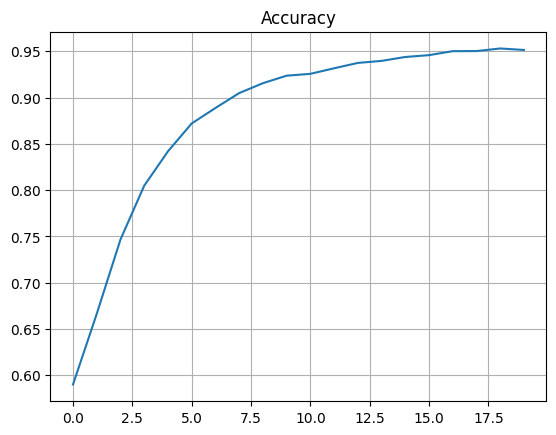

In [19]:
plt.figure()
plt.title("Accuracy")
plt.plot(accs)
plt.grid()
plt.show()

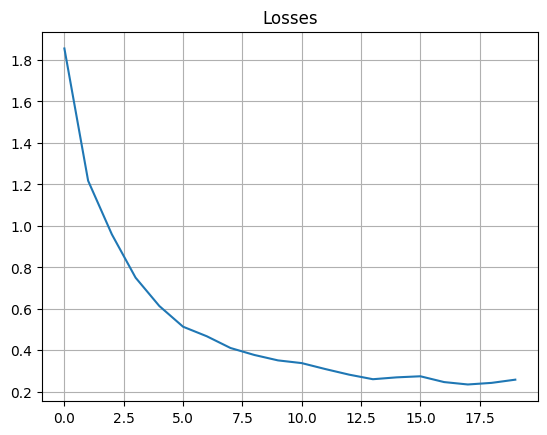

In [20]:
plt.figure()
plt.title("Losses")
plt.plot(losses)
plt.grid()
plt.show()

### Predictions

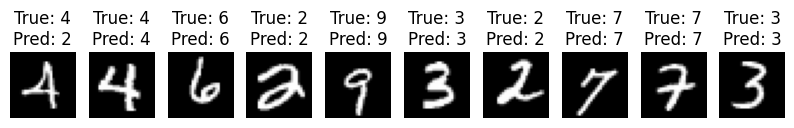

In [21]:
# Plot some example predictions
n_examples = 10
indices = np.random.choice(len(X_test), n_examples)
images = X_test[indices]
labels = y_test[indices]
predictions = feed_forward(
        feed_forward(
            feed_forward(
                images.copy(),
                weights_h1,
                bias_h1,
                activation=relu
            ),
            weights_h2,
            bias_h2,
            activation=relu
        ), 
        weights_out, 
        bias_out, 
        activation=softmax
    )
plt.figure(figsize=(10, 10))
for i in range(n_examples):
    plt.subplot(1, n_examples, i+1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title('True: {}\nPred: {}'.format(labels[i], np.argmax(predictions[i])))
plt.show()

